<a href="https://colab.research.google.com/github/SophieShin/Python/blob/main/FX_and_Index(TradingVolume)__ARIMA%2BGARCH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

In [23]:
pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.3/981.3 kB 12.9 MB/s eta 0:00:00


In [43]:
from arch import arch_model

In [2]:
df = pd.read_csv("/content/IndexandFX.csv")


In [3]:
df

,Date,TradingVolume,FX
0,20000104,195898.0,1123.0
1,20000105,257696.0,1134.0
2,20000106,203523.0,1147.0
3,20000107,215664.0,1139.5
4,20000110,240175.0,1133.5
...,...,...,...
6172,20250109,404290.0,1460.5
6173,20250110,377586.0,1465.0
6174,20250113,578565.0,1470.8
6175,20250114,414487.0,1463.2


In [10]:
df['log_Fx'] = np.log(df['FX'])
df['log_TradingVolume'] = np.log(df['TradingVolume'])

/tmp/ipython-input-2192188849.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['log_Fx'] = np.log(df['FX'])
/tmp/ipython-input-2192188849.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['log_TradingVolume'] = np.log(df['TradingVolume'])


In [11]:
df['dlog_Fx'] = df['log_Fx'].diff()
df['dlog_TradingVolume'] = df['log_TradingVolume'].diff()

/tmp/ipython-input-233809064.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dlog_Fx'] = df['log_Fx'].diff()
/tmp/ipython-input-233809064.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dlog_TradingVolume'] = df['log_TradingVolume'].diff()


In [13]:
df = df.dropna()

In [33]:
from sklearn.linear_model import LinearRegression


X = df['dlog_Fx'].to_frame()
y = df['dlog_TradingVolume']

model = LinearRegression().fit(X, y)
print("coef:", model.coef_)
print("intercept:", model.intercept_)

coef: [-0.47049242]
intercept: 0.0001388589378283131


/tmp/ipython-input-269906394.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['resid'] = y - y_pred


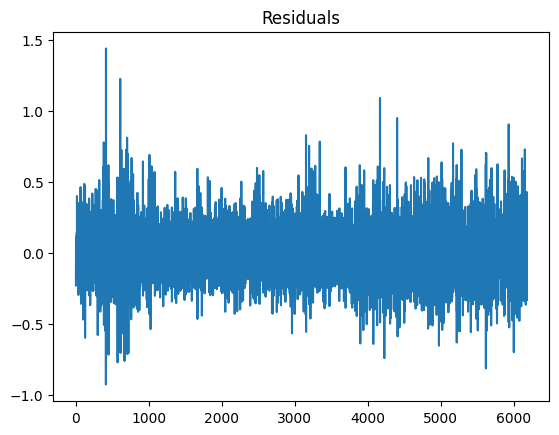

In [16]:
y_pred = model.predict(X)
df['resid'] = y - y_pred
df['resid'].plot(title="Residuals")
plt.show()

In [18]:
adf = adfuller(df['resid'])
print("ADF Statistic:", adf[0])
print("p-value:", adf[1])

ADF Statistic: -19.555543551870954
p-value: 0.0


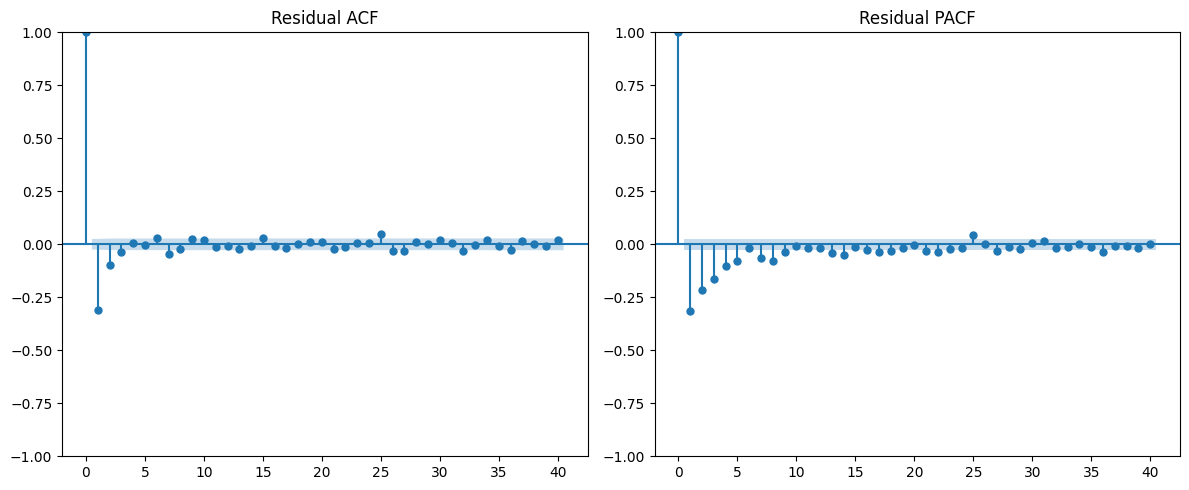

In [19]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

resid = df['resid']

plt.figure(figsize=(12, 5))

# ACF
plt.subplot(1, 2, 1)
plot_acf(resid, ax=plt.gca(), lags=40)
plt.title("ACF_Residual")

# PACF
plt.subplot(1, 2, 2)
plot_pacf(resid, ax=plt.gca(), lags=40, method='yw')  # Yule-Walker 방식
plt.title("PACF_Resicual")

plt.tight_layout()
plt.show()

ACF가 lag2에서 절단이 있고 PACF가 점진적으로 감소하여 AR(2)를 적용. Train/Test Data를 7:3으로 분할하여 모형 Fitting과 예측을 시도

In [34]:
df['resid_train']=df['resid'][:int(len(df)*0.7)]
df['resid_test']=df['resid'][int(len(df)*0.7):]

/tmp/ipython-input-1992764038.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['resid_train']=df['resid'][:int(len(df)*0.7)]
/tmp/ipython-input-1992764038.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['resid_test']=df['resid'][int(len(df)*0.7):]


In [36]:
df['resid_train'] = df['resid_train'].dropna()
df['resid_test'] = df['resid_test'].dropna()


/tmp/ipython-input-1480733987.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['resid_train'] = df['resid_train'].dropna()
/tmp/ipython-input-1480733987.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['resid_test'] = df['resid_test'].dropna()


In [60]:
#ARIMA(2,0,0)
p, d, q = 2, 0, 0
model_arima = ARIMA(df['resid_train'], order=(p, d, q)).fit()
print(model_arima.summary())

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:            resid_train   No. Observations:                 6167
Model:                 ARIMA(2, 0, 0)   Log Likelihood                1442.692
Date:                Sat, 22 Nov 2025   AIC                          -2877.383
Time:                        20:59:50   BIC                          -2850.475
Sample:                             0   HQIC                         -2868.052
                               - 6167                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.341e-05      0.002     -0.037      0.970      -0.003       0.003
ar.L1         -0.3874      0.012    -31.400      0.000      -0.412      -0.363
ar.L2         -0.2243      0.013    -17.532      0.0

모형의 계수는 모두 통계적으로 유의미하나, Heteroskedasticity가 있어 GARCH를 적용

In [38]:
ARIMA_Resid = model_arima.resid

In [49]:
ARIMA_Resid = ARIMA_Resid.dropna()

In [50]:
arch_model = arch_model(ARIMA_Resid, vol = 'GARCH', p=1, q=1, mean='Zero', dist='Normal')

In [51]:
garch_res = garch_model.fit(disp='off')  # disp='off'는 최적화 과정 출력 숨김 옵션
print(garch_res.summary())

/usr/local/lib/python3.12/dist-packages/arch/univariate/base.py:694: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.03. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  self._check_scale(resids)


                       Zero Mean - GARCH Model Results                        
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                1595.09
Distribution:                  Normal   AIC:                          -3184.18
Method:            Maximum Likelihood   BIC:                          -3165.07
                                        No. Observations:                 4316
Date:                Sat, Nov 22 2025   Df Residuals:                     4316
Time:                        20:52:16   Df Model:                            0
                              Volatility Model                              
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      2.6480e-04  9.748e-05      2.716  6.598e-03 [7.

금융데이터로 음의 충격시 변동성이 더 커질 수 있어 GJR GARCH를 적용 시도

In [31]:
gjr = arch_model(
    ARIMA_Resid,
    vol='GARCH',
    p=1,
    o=1,
    q=1,
    mean='Zero',
    dist='normal'
)

gjr_res = gjr.fit(disp='off')
print(gjr_res.summary())

                     Zero Mean - GJR-GARCH Model Results                      
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                  GJR-GARCH   Log-Likelihood:                1924.69
Distribution:                  Normal   AIC:                          -3841.39
Method:            Maximum Likelihood   BIC:                          -3814.48
                                        No. Observations:                 6167
Date:                Sat, Nov 22 2025   Df Residuals:                     6167
Time:                        20:32:41   Df Model:                            0
                               Volatility Model                               
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
omega       2.8674e-04  1.032e-04      2.778  5.468e

/usr/local/lib/python3.12/dist-packages/arch/univariate/base.py:694: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.03338. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  self._check_scale(resids)


GJR GARCH의 AIC, BIC값이 더 높으며, gamma값도 유의하지 않아 GARCH가 더 나은 모형이라고 판단됨

In [58]:
from arch import arch_model # Re-import to ensure arch_model is the function
model = arch_model(ARIMA_Resid, mean = 'ARX', lags = 2, vol='GARCH', p=1, q=1, dist='Normal')
res = model.fit(disp='off')
print(res.summary)

<bound method ARCHModelResult.summary of                            AR - GARCH Model Results                           
Dep. Variable:                   None   R-squared:                       0.006
Mean Model:                        AR   Adj. R-squared:                  0.006
Vol Model:                      GARCH   Log-Likelihood:                1606.83
Distribution:                  Normal   AIC:                          -3201.66
Method:            Maximum Likelihood   BIC:                          -3163.44
                                        No. Observations:                 4314
Date:                Sat, Nov 22 2025   Df Residuals:                     4311
Time:                        20:59:14   Df Model:                            3
                                  Mean Model                                  
                 coef    std err          t      P>|t|        95.0% Conf. Int.
------------------------------------------------------------------------------
Const      

/usr/local/lib/python3.12/dist-packages/arch/univariate/base.py:694: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.02981. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  self._check_scale(resids)


In [64]:
horizon = len(df['resid_test'])
forecast = res.forecast(start=res.nobs, horizon=horizon)

In [65]:
mean_forecast = forecast.mean.iloc[-1].values
var_forecast = forecast.variance.iloc[-1].values

In [66]:
data_true = df['resid_test'].values
data_pred = mean_forecast

In [68]:
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [70]:
split_point = int(len(df['resid']) * 0.7)

data_true = df['resid'].iloc[split_point:].values
data_pred = mean_forecast

# Ensure lengths match in case of minor discrepancies, though they should be equal
min_len = min(len(data_true), len(data_pred))
data_true = data_true[:min_len]
data_pred = data_pred[:min_len]

rmse = np.sqrt(mean_squared_error(data_true, data_pred))
mae  = mean_absolute_error(data_true, data_pred)

print("=== Forecast Performance (Mean) ===")
print("RMSE:", rmse)
print("MAE :", mae)

=== Forecast Performance (Mean) ===
RMSE: 0.2175959886057241
MAE : 0.17025498571874084


In [73]:
data_true_sq = (data_true ** 2)
y_var_pred = var_forecast[:min_len]   # Slice var_forecast to match data_true_sq's length

rmse_var = np.sqrt(mean_squared_error(data_true_sq, y_var_pred))
mae_var  = mean_absolute_error(data_true_sq, y_var_pred)

print("=== Forecast Performance (Variance) ===")
print("RMSE (r^2 vs variance):", rmse_var)
print("MAE  (r^2 vs variance):", mae_var)

=== Forecast Performance (Variance) ===
RMSE (r^2 vs variance): 0.07767269671901884
MAE  (r^2 vs variance): 0.04231414039367056
